### Importing Modules (p184)

In [1]:
# for linear systems of equations
from scipy import linalg as la

# for nonlinear equations
from scipy import optimize

import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Linear Equation Systems (p185)

$
a_{11}x_1+a_{12}x_2+...+a_{1n}x_n=b_1 \\
\quad \quad \quad \quad ⋮ \\
a_{m1}x_1+a_{m2}x_2+...+a_{mn}x_n=b_m
$

$
Ax=b\\
- A : m \times n \: matrix \\ 
- b : m \times 1 \: matrix \\
- x : (unknown) \: n \times 1 \: matrix \\
\Rightarrow system\: is \: 
\begin{cases}underdetermined \: (if \: n < m)\\overdetermined\: (if\: m>n)\\can\: have\: a\: unique\: solution\: (if\: m=n)\end{cases}
$

#### Square Systems (p186)

$
2x_1+3x_2=4 \\
5x_1+4x_2=3
$

* using SymPy

In [2]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [3]:
A

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [4]:
b

⎡4⎤
⎢ ⎥
⎣3⎦

In [5]:
A.rank()

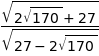

In [6]:
# TODO
A.condition_number()

In [7]:
# TODO
sympy.N(_)

In [8]:
A.norm()

* using NumPy/SciPy

In [9]:
A_ = np.array([[2, 3], [5, 4]])
b_ = np.array([4, 3])

In [10]:
A_

array([[2, 3],
       [5, 4]])

In [11]:
b_

array([4, 3])

In [12]:
np.linalg.matrix_rank(A_)

2

In [13]:
np.linalg.cond(A_)

In [14]:
np.linalg.norm(A_)

* solve linear problems with LU factorization

In [15]:
# _ : a list of row swap index pairs
L, U, _ = A.LUdecomposition()

In [16]:
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [17]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [18]:
A == L * U

True

In [19]:
A.solve(b)

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [20]:
A.LUsolve(b)

⎡-1⎤
⎢  ⎥
⎣2 ⎦

* solve numerical problems with SciPy's linear algebra module

In [21]:
A_

array([[2, 3],
       [5, 4]])

In [22]:
P, L, U = la.lu(A_)

In [23]:
P

array([[0., 1.],
       [1., 0.]])

In [24]:
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [25]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [26]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [27]:
la.solve(A_, b_)

array([-1.,  2.])

In [28]:
# SymPy
  # obtains exact results
  # includes symbolic variables in the matrices
  # gives exceedingly lengthly results
# NumPy/SciPy
  # guarantees to obtain a result
  # obtains approximate solution due to floating-point errors

* SymPy

In [29]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([
    [1, sympy.sqrt(p)],
    [1, 1/sympy.sqrt(p)]
])
b = sympy.Matrix([1, 2])

In [30]:
P

array([[0., 1.],
       [1., 0.]])

In [31]:
A

⎡1  √p⎤
⎢     ⎥
⎢   1 ⎥
⎢1  ──⎥
⎣   √p⎦

In [32]:
b

⎡1⎤
⎢ ⎥
⎣2⎦

In [33]:
x = A.solve(b)
x

⎡        1 ⎤
⎢-2⋅√p + ──⎥
⎢        √p⎥
⎢──────────⎥
⎢       1  ⎥
⎢ -√p + ── ⎥
⎢       √p ⎥
⎢          ⎥
⎢    1     ⎥
⎢ ──────── ⎥
⎢       1  ⎥
⎢ -√p + ── ⎥
⎣       √p ⎦

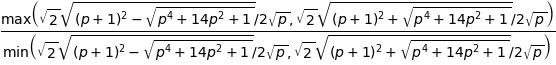

In [34]:
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()
Acond

* NumPy

In [35]:
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

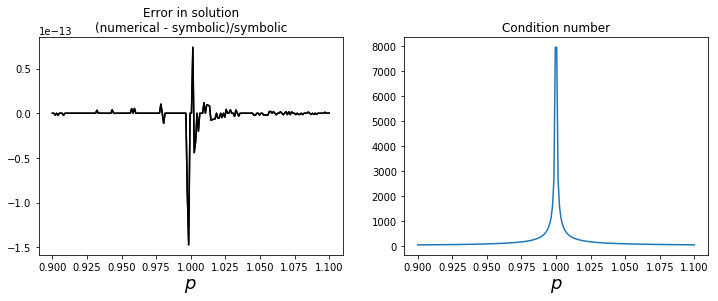

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

p_vec = np.linspace(0.9, 1.1, 200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18);

#### Rectangular Systems (p192)


$
\text{underdeterminted linear equation system} \\ 
\begin{pmatrix}1&2&3\\4&5&6\end{pmatrix}
\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}
=
\begin{pmatrix}7\\8\end{pmatrix}
$

In [37]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])

In [38]:
sympy.solve(A*x - b, x_vars)

$
\text{overdetermined linear equation system} \\
\begin{pmatrix}1&x_1&x_1^2\\⋮&⋮&⋮\\1&x_m&x_m^2\end{pmatrix}
\begin{pmatrix}A\\B\\C\end{pmatrix}
=
\begin{pmatrix}y_1\\⋮\\y_m\end{pmatrix}
$

In [39]:
# true model params
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

In [40]:
# nosiy data
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

In [41]:
# model fitting using LLS
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = la.lstsq(A.T, Y)

In [42]:
sol

array([1.13365783, 1.99538105, 2.64384504])

In [43]:
r

In [44]:
rank

In [45]:
sv

array([10.83029751,  6.24476505,  2.8781652 ])

In [46]:
y_fit = sol[0] + sol[1] * x + sol[2] * x**2

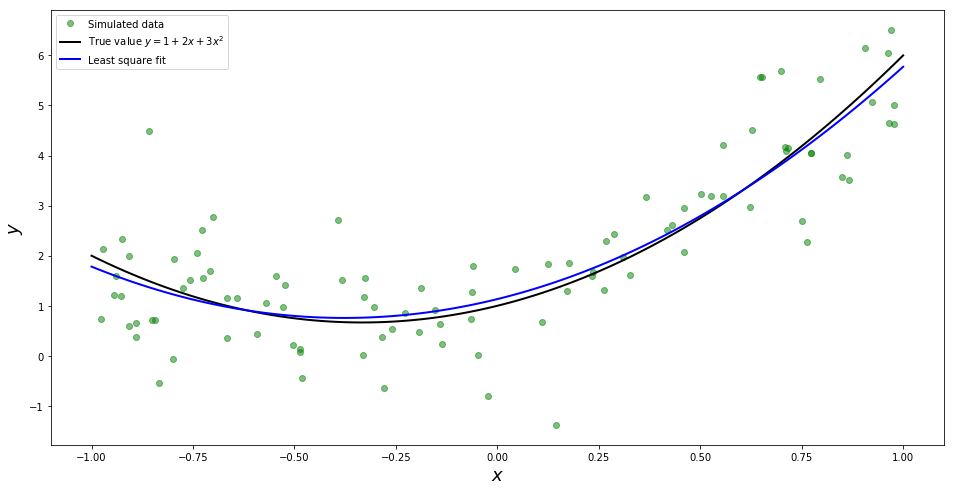

In [47]:
# underfitted
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

In [48]:
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

In [49]:
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

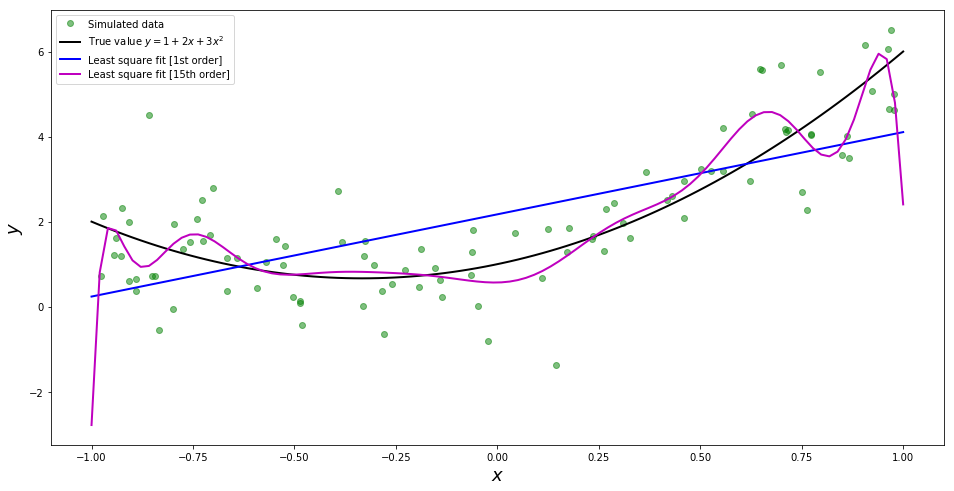

In [50]:
# overfitted
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

#### Eigenvalue Problems (p196)

$
Ax=\lambda x \\
- A\: :\: N \times N\: square\: matrix \\
- x\: :\: unknown\: vector \\
- \lambda \: :\: scalar \\
\Rightarrow \begin{cases}\lambda\: :\: eigenvalue\: of\: the\: matrix\: A\\x\: :\: eigenvector\end{cases}
$

* SymPy

In [51]:
eps, delta = sympy.symbols("epsilon, Delta")
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

⎡ε  Δ ⎤
⎢     ⎥
⎣Δ  -ε⎦

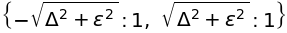

In [52]:
H.eigenvals()

In [53]:
H.eigenvects()

⎡⎛                  ⎡⎡      -Δ        ⎤⎤⎞  ⎛                 ⎡⎡      -Δ       
⎢⎜    _________     ⎢⎢────────────────⎥⎥⎟  ⎜   _________     ⎢⎢───────────────
⎢⎜   ╱  2    2      ⎢⎢       _________⎥⎥⎟  ⎜  ╱  2    2      ⎢⎢       ________
⎢⎜-╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2 ⎥⎥⎟, ⎜╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2
⎢⎜                  ⎢⎢ε + ╲╱  Δ  + ε  ⎥⎥⎟  ⎜                 ⎢⎢ε - ╲╱  Δ  + ε 
⎢⎜                  ⎢⎢                ⎥⎥⎟  ⎜                 ⎢⎢               
⎣⎝                  ⎣⎣       1        ⎦⎦⎠  ⎝                 ⎣⎣       1       

 ⎤⎤⎞⎤
─⎥⎥⎟⎥
_⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎦⎦⎠⎦

In [54]:
# verify the two eigenvectors are orthogonal
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
sympy.simplify(evec1[0].T * evec2[0])

[0]

* NumPy (mainly for larger systems)

In [55]:
A = np.array([
    [1, 3, 5],
    [3, 5, 3],
    [5, 3, 9]
])
evals, evecs = la.eig(A)

In [56]:
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [57]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [58]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

#### Nonlinear Equations (p198)

$
linear\: function\: f(x) \begin{cases}additivity\: f(x+y)=f(x)+f(y)\\homogeneity\: f(\alpha x)=\alpha f(x)\end{cases} \\
nonlinear\: function\: does\: not\: satisfy\: above\: conditions
$

##### Univariate Equations (p199)

* well-known formula

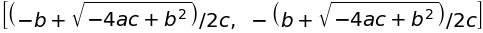

In [59]:
x, a, b, c = sympy.symbols("x, a, b, c")
sympy.solve(a + b*x + c*x**2, x)

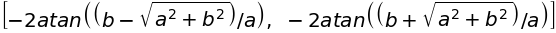

In [60]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

* general non-linear equations

In [61]:
# raises NotImplementedError
sympy.solve(sympy.sin(x)-x, x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

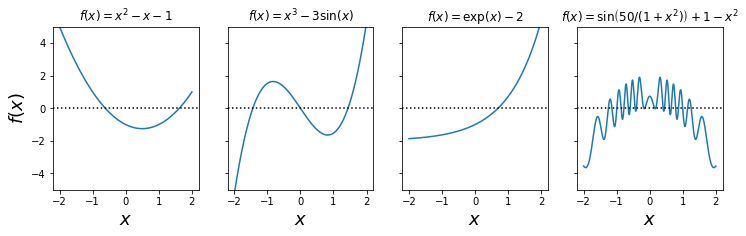

In [62]:
x = np.linspace(-2, 2, 1000)
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
    
axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [
    r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
    r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$'
]

for n, title in enumerate(titles):
    axes[n].set_title(title);

* bisection method

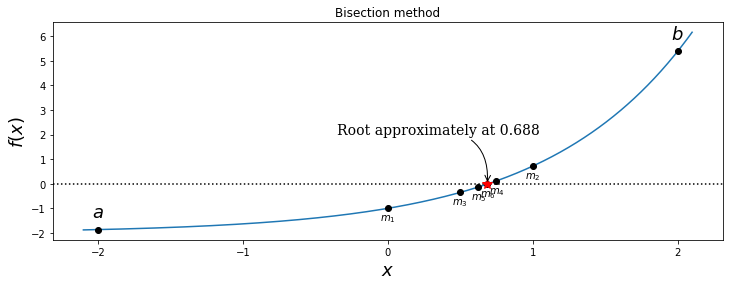

In [63]:
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)
    
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    
ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
    
fa, fb = f(a), f(b)
    
ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)
    
n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)
    
    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
    fontsize=14, family="serif",
    xy=(a, fm), xycoords='data',
    xytext=(-150, +50), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
    connectionstyle="arc3, rad=-.5")
)
ax.set_title("Bisection method");

* newton's method

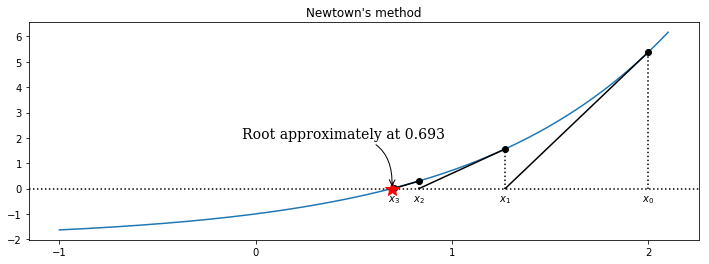

In [64]:
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)


fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
                
ax.annotate("Root approximately at %.3f" % xk,
    fontsize=14, family="serif",
    xy=(xk, f(xk)), xycoords='data',
    xytext=(-150, +50), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
    connectionstyle="arc3, rad=-.5")
)

ax.set_title("Newtown's method")
ax.set_xticks([-1, 0, 1, 2]);

* SciPy.optimize

In [65]:
# f(a) and f(b) need to have different signs
optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

In [66]:
# need to pass a function and an initial guess for the root of the function
# can pass the derivative of the function with fprime kwarg
x_root_guess = 2
f = lambda x: np.exp(x) - 2
fprime = lambda x: np.exp(x)
optimize.newton(f, x_root_guess), optimize.newton(f, x_root_guess, fprime=fprime)

In [67]:
# don't know which root is being computed in case there exists multiple roots
# can use optimize.brentq and optimize.brenth for root finding
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2), optimize.brenth(lambda x: np.exp(x) - 2, -2, 2)

##### Systems of Nonlinear Equations (p207)

$
y-x^3-2x^2+1=0 \\
y+x^2-1=0 \\
\Rightarrow f([x_1,\: x_2])=[x_2-x_1^3-2x_1^2+1,\: x_2+x_1^2-1]
$

In [68]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

In [69]:
optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [70]:
# derive Jacobian using SymPy
x, y = sympy.symbols("x, y")
f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat.jacobian(sympy.Matrix([x, y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [71]:
def f_jacobian(x):     
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

In [72]:
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

In [73]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

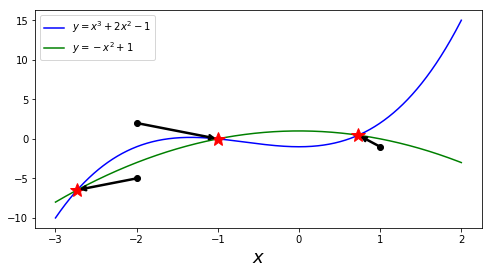

In [74]:
# initial guess for the solution matters
# still, there's no guarantee that any solution is found
x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)
    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0],
            x_guess[1]),
            arrowprops=dict(arrowstyle="->", linewidth=2.5))
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18);

/Users/geeyeol/.pyenv/versions/3.7.1/envs/python3-staging/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


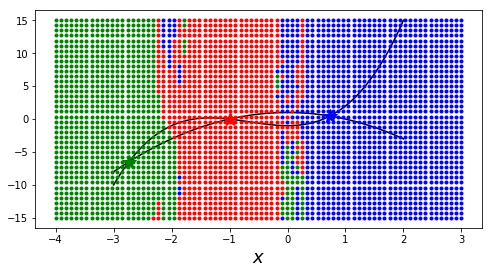

In [75]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5)
ax.plot(x, y2, 'k', lw=1.5)

sol1 = optimize.fsolve(f, [-2,  2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])
sols = [sol1, sol2, sol3]
colors = ['r', 'b', 'g']

for idx, s in enumerate(sols):
    ax.plot(s[0], s[1], colors[idx]+'*', markersize=15)


for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)
        idx = (abs(sols - sol)**2).sum(axis=1).argmin()
        ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')

ax.set_xlabel(r'$x$', fontsize=18);